# Assignment 3
- Donwload  ziptrain.csv and ziptest.csv datasets from  https://github.com/vahidpartovinia/ycbs255/

# 1- Differentiate digit 2 from Digit 7
## 1.1- Two principal components
- Select only digit 2, and digit 7 from ziptrain data set. 
- Project ziprain onto two principal components
- Make a scatterplot to confirm wheather or not only two principal components separates digit 2 from digit 7.

## 1.2- Logistic regression
- Fit a logistic regression to separate digit 2 from digit 7 over the projected 2 principal components.  Remember in logistic regression, classes are differentiated using 0 and 1 (and not 2 or 7).
- Build the confusion matrix on ziptest and check how well the model works on the test data.

# 2 -Multiple principal components
- Project train data onto "m = 2, 3, ..." principal components.
- Choose an "m" so that the classification of digit 2 and 7 is the most precise on ziptest.

# 3-Differentiate all digits 
- Project ziprain onto two principal components
- Make a scatterplot to confirm wheather or not only two principal components separates all digits properly.
- Use linear discriminant on ziptrain over 256 original pixels and build the confusion matrix of this model over ziptrain
- Use linear disciminant over "m" projected principal components, with the appropriate choice of "m" (where the precision of prediction maximizes over ziptest data set).


# Submission note
Please fill this jupyter notebook. Extract the pdf file as follows. On  Jupyter manue go to File/Print Preview, then on Browser menu go to File/Print. 

## Only PDF  Submissions will be graded


# Question 1.1 


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns



In [36]:
#Zip train data set
zipdata_train = np.loadtxt("C:\\Users\\mpucci\\Desktop\\ziptrain.csv")
#zipdata_train.shape;

#zip test data set
zipdata_test = np.loadtxt("C:\\Users\\mpucci\\Desktop\\ziptest.csv")
#zipdata_test.shape; 

zipdata_test2 = zipdata_test[zipdata_test[:,0] == 2] 
#zipdata_train2.shape
#731 number 2 in this data set

zipdata_test7 = zipdata_test[zipdata_test[:,0] == 7] 
#zipdata_train7.shape
#645 number 7 in this data set

#combine the two datasets together
zipdata_test27 = np.vstack([zipdata_test2, zipdata_test7])
print(zipdata_test27.shape)

zipdata_train2 = zipdata_train[zipdata_train[:,0] == 2] 
#zipdata_train2.shape
#731 number 2 in this data set

zipdata_train7 = zipdata_train[zipdata_train[:,0] == 7] 
#zipdata_train7.shape
#645 number 7 in this data set

#combine the two datasets together
zipdata_train27 = np.vstack([zipdata_train2, zipdata_train7])
print(zipdata_train27.shape)


(345, 257)
(1376, 257)


Text(0.5,1,'PCA Analysis in relation to PCA Features')

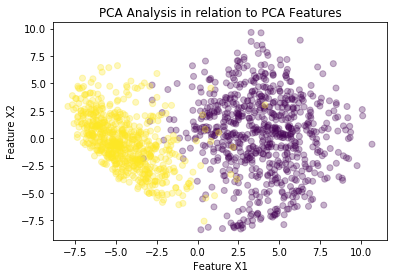

In [37]:
#Number of principle components
pca = PCA(n_components=2)

# remove the first column (image label)
pca.fit(zipdata_train27[:, 1:])
Z = pca.fit_transform(zipdata_train27[:,1:])
Z1 = pca.transform(zipdata_test27[:,1:])

plt.scatter(Z[:,0], Z[:,1], c= zipdata_train27[:,0], alpha=0.3);
plt.xlabel("Feature X1")
plt.ylabel("Feature X2")
plt.title("PCA Analysis in relation to PCA Features")


[0.19889716 0.09074826]


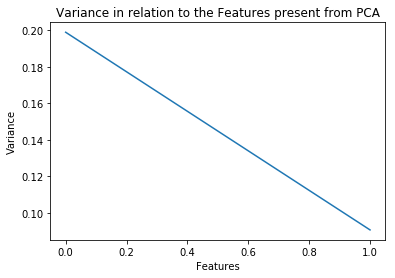

Rate of change graph with respect to variance attributed to each principle component of PCA


In [38]:
print(pca.explained_variance_ratio_)

plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Features")
plt.ylabel("Variance")
plt.title("Variance in relation to the Features present from PCA")
plt.show()

print("Rate of change graph with respect to variance attributed to each principle component of PCA")

## Question 1.2 


this is the confusion matrix
[[193   5]
 [  7 140]]


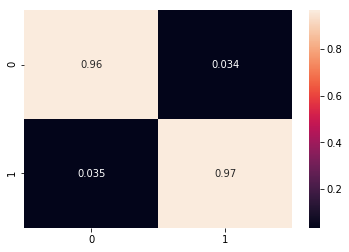

In [39]:
from sklearn.linear_model import LogisticRegression
pcr = LogisticRegression() 

y= ((zipdata_train27[:,0]))     # test real y values
y_values = zipdata_test27[:,0]  # validation real y values

y_array_test = []
y_array_valid = []

#Binarize the digit values in Training set.
for i in y:
    if i == 2:
        y_array_test.append(0)
    if i == 7:
        y_array_test.append(1)


#Binarize the digit values in Validation set.       
for i in y_values:
    if i == 2:
        y_array_valid.append(0)
    if i == 7:
        y_array_valid.append(1)
        
pcr.fit(Z,y_array_test)
predictions = pcr.predict(Z1)

#End of Question 2.1

#from sklearn.metrics import confusion_matrix
y_pred = pcr.predict(Z1)

print("this is the confusion matrix")
print(confusion_matrix(y_array_valid, y_pred))
x=confusion_matrix(y_array_valid, y_pred)
sns.heatmap(x/x.sum(axis=0),annot=True)

# End of Question 2.2

## Question 2

[0.19889716 0.09074826 0.07252037 0.05855306 0.04295778 0.03719129
 0.0288411  0.02600548 0.02415564 0.02206166 0.01953809 0.01732969
 0.01641846 0.01571794 0.01493264 0.01369773 0.01272871 0.01166821
 0.01109275 0.00930992 0.00905987 0.00881982 0.00827234 0.00794087
 0.00779167 0.00682093 0.00666078 0.00636779 0.00596304 0.0055841
 0.0053104  0.00497514 0.00492257 0.00471926 0.00464955 0.00452764
 0.00417148 0.00397837 0.00383367 0.00367051 0.00360403 0.00341459
 0.00331875 0.00328134 0.00310679 0.00304461 0.00292634 0.0028047
 0.00264096 0.00260294 0.00252491 0.00244292 0.00231504 0.00226172
 0.00217261 0.00209939 0.00208735 0.0020643  0.00197887 0.00193664
 0.00186778 0.00182113 0.00180147 0.00176224 0.00169969 0.00166233
 0.00163667 0.0015913  0.00152784 0.00149218 0.00146541 0.00141317
 0.00139736 0.00135286 0.00130257 0.00126964 0.00122619 0.00120706
 0.00117237 0.0011463  0.00113311 0.00110546 0.00107981 0.00104721
 0.00100538 0.00097112 0.000958   0.00095076 0.00092096 0.000901

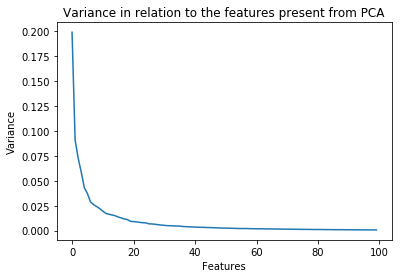

Rate of change graph with respect to variance attributed to each principle component of PCA
This is the sum of variance accounted for by the model's principle components 96.28083788382165


In [40]:
pca = PCA(n_components=100)
# remove the first column (image label)
pca.fit(zipdata_train27[:, 1:])

Z = pca.fit_transform(zipdata_train27[:,1:])
Z1 = pca.transform(zipdata_test27[:,1:])

print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Features")
plt.ylabel("Variance")
plt.title("Variance in relation to the features present from PCA")
plt.show()

print("Rate of change graph with respect to variance attributed to each principle component of PCA")
print("This is the sum of variance accounted for by the model's principle components" + " " + str(100*pca.explained_variance_ratio_.sum()))


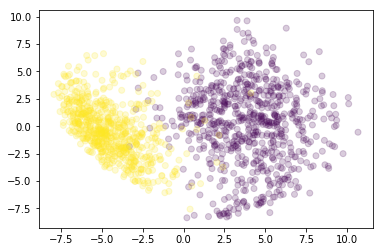

In [41]:
pca1 = PCA(n_components=16)   # 16 components were chosen since a cut off 70% of the accounted variance of the model 

pca1.fit(zipdata_train27[:, 1:])   # First column is the picture label

Z = pca1.fit_transform(zipdata_train27[:,1:])
Z1 = pca1.transform(zipdata_test27[:,1:])

plt.scatter(Z[:,0], Z[:,1], c= zipdata_train27[:,0], alpha=0.2); #Scatter plot for two principle component projections3

[0.19889716 0.09074826 0.07252037 0.05855306 0.04295778 0.03719129
 0.0288411  0.02600548 0.02415564 0.02206166 0.01953809 0.01732968
 0.01641845 0.01571781 0.01493254 0.01369751]


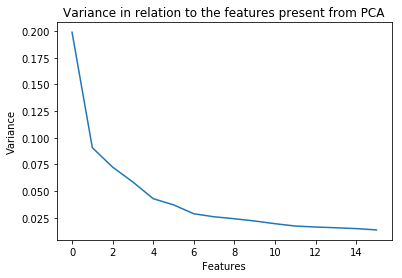

Rate of change graph with respect to variance attributed to each principle component of PCA1


In [42]:
print(pca1.explained_variance_ratio_)
plt.plot(pca1.explained_variance_ratio_)
plt.xlabel("Features")
plt.ylabel("Variance")
plt.title("Variance in relation to the features present from PCA")
plt.show()

print("Rate of change graph with respect to variance attributed to each principle component of PCA1")

this is the confusion matrix
[[718  13]
 [  9 636]]


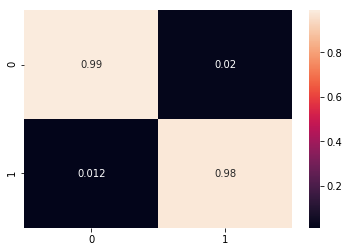

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()


y= ((zipdata_train27[:,0]))     # test real y values
y_values = zipdata_test27[:,0]  # validation real y values

y_array_test1 = []
y_array_valid1 = []

#Binarize the digit values in Training set.
for i in y:
    if i == 2:
        y_array_test1.append(0)
    if i == 7:
        y_array_test1.append(1)


#Binarize the digit values in Validation set.       
for i in y_values:
    if i == 2:
        y_array_valid1.append(0)
    if i == 7:
        y_array_valid1.append(1)
        
lda.fit(Z,y_array_test1)                   #LDA FIT
predictions = lda.predict(Z)               #LDA Predictions

from sklearn.metrics import confusion_matrix
y_pred = lda.predict(Z)

print("this is the confusion matrix")
print(confusion_matrix(y_array_test1, y_pred))
x=confusion_matrix(y_array_test1, y_pred)
sns.heatmap(x/x.sum(axis=0),annot=True)


## Question 3


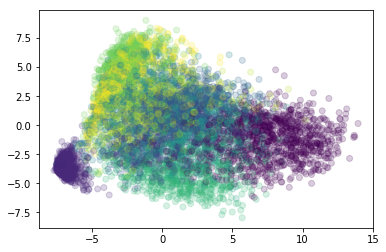

In [44]:
pca2 = PCA(n_components=2)
# remove the first column (image label)
pca2.fit(zipdata_train[:, 1:])

Z2 = pca2.fit_transform(zipdata_train[:,1:])
Z3 = pca2.transform(zipdata_test[:,1:])

plt.scatter(Z2[:,0], Z2[:,1], c= zipdata_train[:,0], alpha=0.2)

[0.17884424 0.0896704 ]


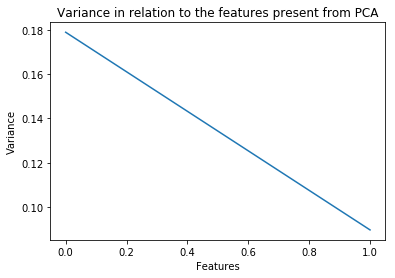

Rate of change graph with respect to variance attributed to each principle component of PCA2
This is the sum of variance accounted for by the model's principle components 26.85146393123089


In [45]:
print(pca2.explained_variance_ratio_)
plt.plot(pca2.explained_variance_ratio_)
plt.xlabel("Features")
plt.ylabel("Variance")
plt.title("Variance in relation to the features present from PCA")
plt.show()

print("Rate of change graph with respect to variance attributed to each principle component of PCA2")
print("This is the sum of variance accounted for by the model's principle components" + " " + str(100*pca2.explained_variance_ratio_.sum()))

This is the confusion matrix
[[296   0  11  18   1  12  21   0   0   0]
 [  0 257   0   2   2   0   3   0   0   0]
 [ 17  11  69  44  12  10  27   0   6   2]
 [ 20   0  33  68  20  15   1   1   7   1]
 [  2  17  11  20  60   4   7  32   5  42]
 [ 37   1  29  33   7  19  33   0   1   0]
 [ 23   9  14   2   1   7 114   0   0   0]
 [  0   2   2   4   8   0   0 100   0  31]
 [  8   6  32  45  54   4   1   5   6   5]
 [  0  10   0   7  30   0   0  81   1  48]]


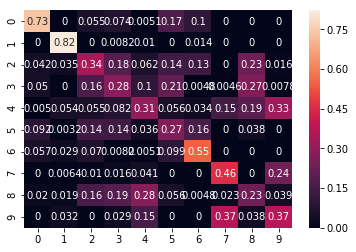

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda1 = LinearDiscriminantAnalysis()


y= zipdata_train[:,0]         # test real y values
y_values = zipdata_test[:,0]  # validation real y values

y_array_test1 = []
y_array_valid1 = []

#Binarize the digit values in Training set.
for i in y:
    if i == 2:
        y_array_test1.append(0)
    if i == 7:
        y_array_test1.append(1)


#Binarize the digit values in Validation set.       
for i in y_values:
    if i == 2:
        y_array_valid1.append(0)
    if i == 7:
        y_array_valid1.append(1)
        
lda1.fit(Z2,y)                   #LDA FIT
predictions = lda1.predict(Z3)               #LDA Predictions

from sklearn.metrics import confusion_matrix
y_pred = lda1.predict(Z3)

print("This is the confusion matrix")
print(confusion_matrix(y_values, y_pred))
x=confusion_matrix(y_values, y_pred)
sns.heatmap(x/x.sum(axis=0),annot=True)


In [47]:
pca2 = PCA(n_components=18)
# remove the first column (image label)
pca2.fit(zipdata_train[:, 1:])

Z2 = pca2.fit_transform(zipdata_train[:,1:])
Z3 = pca2.transform(zipdata_test[:,1:])


[0.17884424 0.0896704  0.06571727 0.05554546 0.04914189 0.03851923
 0.03271056 0.03071029 0.02566823 0.02436703 0.02177514 0.02020786
 0.01703614 0.01469114 0.01416218 0.01298081 0.01224935 0.01152225]


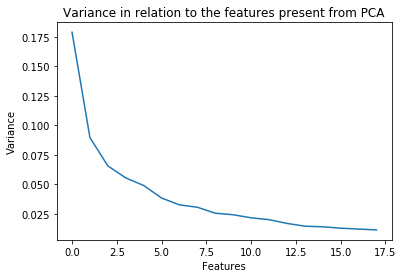

Rate of change graph with respect to variance attributed to each principle component of PCA2
This is the sum of variance accounted for by the model's principle components 71.55194750491187


In [48]:
print(pca2.explained_variance_ratio_)
plt.plot(pca2.explained_variance_ratio_)
plt.xlabel("Features")
plt.ylabel("Variance")
plt.title("Variance in relation to the features present from PCA")
plt.show()

print("Rate of change graph with respect to variance attributed to each principle component of PCA2")
print("This is the sum of variance accounted for by the model's principle components" + " " + str(100*pca2.explained_variance_ratio_.sum()))

In [49]:
#NOTE: After 18 principle components, the rate of change with the respect to variance from each principle component does not
#change substantially here on out. Therefore, the model is being subjectted to overfitting as we increase the principle
#components included in the model. There is an inherit trade off with the flexbility our model inherits and overfitting of
#our results.

This is the confusion matrix
[[333   0   1   1   3   6   8   1   5   1]
 [  0 254   0   2   2   0   2   0   2   2]
 [  6   0 150   6  11   2   5   4  14   0]
 [  3   0   3 138   3  15   0   0   2   2]
 [  0   9   8   0 148   0   2   2   4  27]
 [  7   0   0  17   4 121   1   0   6   4]
 [  5   0   4   0   3   5 152   0   1   0]
 [  0   1   0   2   4   0   0 126   1  13]
 [  2   1   2  12   3   8   0   2 130   6]
 [  0   3   0   0  13   1   0   7   3 150]]


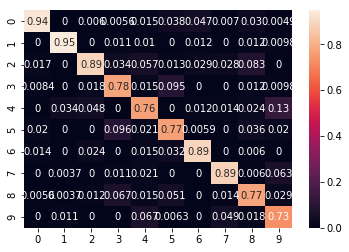

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda1 = LinearDiscriminantAnalysis()


y= zipdata_train[:,0]         # test real y values
y_values = zipdata_test[:,0]  # validation real y values

y_array_test1 = []
y_array_valid1 = []

#Binarize the digit values in Training set.
for i in y:
    if i == 2:
        y_array_test1.append(0)
    if i == 7:
        y_array_test1.append(1)


#Binarize the digit values in Validation set.       
for i in y_values:
    if i == 2:
        y_array_valid1.append(0)
    if i == 7:
        y_array_valid1.append(1)
        
lda1.fit(Z2,y)                   #LDA FIT
predictions = lda1.predict(Z3)               #LDA Predictions

from sklearn.metrics import confusion_matrix
y_pred = lda1.predict(Z3)

print("This is the confusion matrix")
print(confusion_matrix(y_values, y_pred))
x=confusion_matrix(y_values, y_pred)
sns.heatmap(x/x.sum(axis=0),annot=True)

## 18 Principle Components 

In [51]:
#Note: Elbow analysis on Variance versus PCA components was used to determine precision for this assignment/analysis